# Data Visualization - Univariate visualisations

## 1. Bar Charts

A bar chart is used to depict the distribution of a categorical variable. In a bar chart, each level of the categorical variable is depicted with a bar, whose height indicates the frequency of data points that take on that level. A basic bar chart of frequencies can be created through the use of seaborn's **`countplot`** function:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv('pokemon.csv')
print(df.shape)
df.head()

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


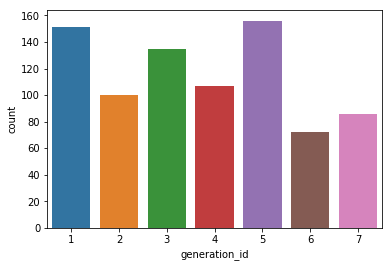

In [2]:
sns.countplot(data = df, x ='generation_id');

By default, each category is given a different color. This might come in handy for building associations between these category labels and encodings in plots with more variables. Otherwise, it's a good idea to simplify the plot and reduce unnecessary distractions by plotting all bars in the same color. This can be set using the "color" parameter:

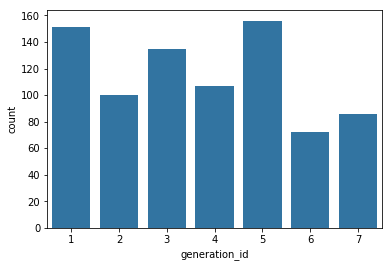

In [3]:
base_color = sns.color_palette()[0]
sns.countplot(data = df, x='generation_id', color = base_color);

color_palette returns a list of RGB tuples. Each tuple consists of three digits specifying the red, green, and blue channel values to specify a color. Calling this function without any parameters returns the current / default palette, and we take the first color to be the color for all bars.

One thing that we might want to do with a bar chart is to sort the data in some way. For nominal-type data, one common operation is to sort the data in terms of frequency. With our data in a pandas DataFrame, we can use various DataFrame methods to compute and extract an ordering, then set that ordering on the "order" parameter:

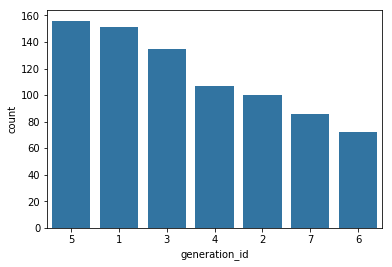

In [4]:
gen_order = df.generation_id.value_counts().index
sns.countplot(data = df, x='generation_id', color = base_color, order = gen_order);

For ordinal-type data, we probably want to sort the bars in order of the variables. While we could sort the levels by frequency like above, we usually care about whether the most frequent values are at high levels, low levels, etc. The best thing for us to do in this case is to convert the column into an ordered categorical data type. By default, pandas reads in string data as object types, and will plot the bars in the order in which the unique values were seen. By converting the data into an ordered type, the order of categories becomes innate to the feature, and we won't need to specify an "order" parameter each time it's required in a plot.

```python
# this method requires pandas v0.21 or later
level_order = ['Alpha', 'Beta', 'Gamma', 'Delta']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
df['cat_var'] = df['cat_var'].astype(ordered_cat)

# # use this method if you have pandas v0.20.3 or earlier
# df['cat_var'] = df['cat_var'].astype('category', ordered = True,
#                                      categories = level_order)

base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'cat_var', color = base_color)
```

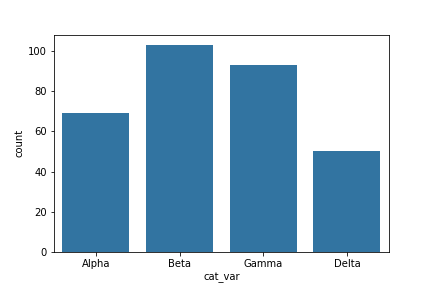

If you have a lot of category levels, or the category names are long, then you might end up with overcrowding of the tick labels. One way to address this is through creation of a horizontal bar chart. In a horizontal bar chart, it is the length of each bar that indicates frequency, rather than the height. In the code, instead of setting the data or variable on the "x" parameter, you can set the variable to be plotted on the parameter "y":



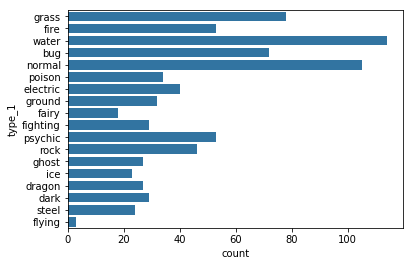

In [5]:
sns.countplot(data = df,y='type_1',color=base_color);

Alternatively, you can use matplotlib's xticks function and its "rotation" parameter to change the orientation in which the labels will be depicted (as degrees counter-clockwise from horizontal):

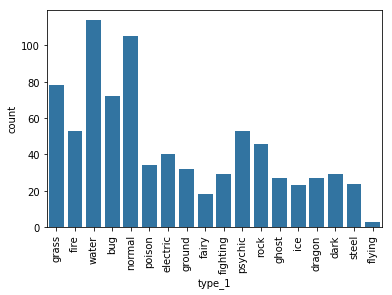

In [6]:
sns.countplot(data = df,x='type_1',color=base_color);
plt.xticks(rotation = 90);

---

## 2. Histograms

A histogram is used to plot the distribution of a numeric variable. It's the quantitative version of the bar chart. However, rather than plot one bar for each unique numeric value, values are grouped into continuous bins, and one bar for each bin is plotted depicting the number. For instance, using the default settings for matplotlib's hist function:
```python
plt.hist(data = df, x = 'num_var')
```
<img src= https://video.udacity-data.com/topher/2018/March/5aaae934_l3-c08-histograms1/l3-c08-histograms1.png>

You can see that there are eight data points that fall in the range between about 0 and 2.5 in the leftmost bin, and nine points in the range from about 2.5 to 5 in the adjacent bin. Overall, a generally bimodal distribution is observed (one with two peaks or humps). The direct adjacency of the bars in the histogram, in contrast to the separated bars in a bar chart, emphasize the fact that the data takes on a continuous range of values. When a data value is on a bin edge, it is counted in the bin to its right. The exception is the rightmost bin edge, which places data values equal to the uppermost limit into the right-most bin (to the upper limit's left).

By default, the hist function divides the data into 10 bins, based on the range of values taken. In almost every case, we will want to change these settings. Usually, having only ten bins is too few to really understand the distribution of the data. And the default tick marks are often not on nice, 'round' values that make the ranges taken by each bin easy to interpret. Wouldn't it be better if I said "between 0 and 2.5" instead of "between about 0 and 2.5", and "from 2.5 to 5" instead of "from about 2.5 to 5" above?

You can use descriptive statistics (e.g. via df['num_var'].describe()) to gauge what minimum and maximum bin limits might be appropriate for the plot. These bin edges can be set using numpy's arange function:
```python
bin_edges = np.arange(0, df['num_var'].max()+1, 1)
plt.hist(data = df, x = 'num_var', bins = bin_edges)
```
The first argument to arange is the leftmost bin edge, the second argument the upper limit, and the third argument the bin width. Note that even though I've specified the "max" value in the second argument, I've added a "+1" (the bin width). That is because arange will only return values that are strictly less than the upper limit. Adding in "+1" is a safety measure to ensure that the rightmost bin edge is at least the maximum data value, so that all of the data points are plotted. The leftmost bin is set as a hardcoded value to get a nice, interpretable value, though you could use functions like numpy's around if you wanted to approach that end programmatically.

<img src=https://classroom.udacity.com/nanodegrees/nd002/parts/9f7e8991-8bfb-4103-8307-3b6f93f0ecc7/modules/1dc09d28-5703-493c-aab5-a418b8bfa3e1/lessons/b86503df-e416-4f0e-9e2d-a7a3c08d0bc3/concepts/c0f67015-ef78-4bd8-98ea-78c25b5ac5b2#>

When creating histograms, it's useful to play around with different bin widths to see what represents the data best. Too many bins, and you may see too much noise that interferes with identification of the underlying signal. Too few bins, and you may not be able to see the true signal in the first place.

```python
plt.figure(figsize = [10, 5]) # larger figure size for subplots

# histogram on left, example of too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, df['num_var'].max()+4, 4)
plt.hist(data = df, x = 'num_var', bins = bin_edges)

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, df['num_var'].max()+1/4, 1/4)
plt.hist(data = df, x = 'num_var', bins = bin_edges)
```

This example puts two plots side by side through use of the subplot function, whose arguments specify the number of rows, columns, and index of the active subplot (in that order). The figure() function is called with the "figsize" parameter so that we can have a larger figure to support having multiple subplots. (More details on figures and subplots are coming up next in the lesson.)

<img src = https://video.udacity-data.com/topher/2018/March/5aaaf900_l3-c08-histograms3/l3-c08-histograms3.png>

### Alternative Approach

The seaborn function distplot can also be used to plot a histogram, and is integrated with other univariate plotting functions.
```python
sb.distplot(df['num_var'])
```
When we specify the data to be plotted, note that the first argument must be the Series or array with the points to be plotted. This is in contrast to our ability to specify a data source and column as separate arguments, like we've seen with and countplot and hist.

<img src = https://video.udacity-data.com/topher/2018/March/5aab083d_l3-c08-histograms4/l3-c08-histograms4.png>

The distplot function has built-in rules for specifying histogram bins, and by default plots a curve depicting the kernel density estimate (KDE) on top of the data. The vertical axis is based on the KDE, rather than the histogram: you shouldn't expect the total heights of the bars to equal 1, but the area under the curve should equal 1. If you want to learn more about KDEs, check out the extra page at the end of the lesson.

Despite the fact that the default bin-selection formula used by distplot might be better than the choice of ten bins that .hist uses, you'll still want to do some tweaking to align the bins to 'round' values. You can use other parameter settings to plot just the histogram and specify the bins like before:
```python
bin_edges = np.arange(0, df['num_var'].max()+1, 1)
sb.distplot(df['num_var'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})
```
The alpha (transparency) setting must be associated as a dictionary to "hist_kws" since there are other underlying plotting functions, like the KDE, that have their own optional keyword parameters.

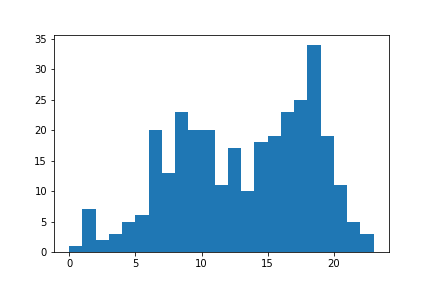

The result of the code above is exactly like the histogram above with bin width of 1. The units of the vertical axis are also back in terms of counts.

In summary, if your exploration is only interested in the histogram-depiction of the data, and not the additional functionality offered by distplot, then you might be better off with just using Matplotlib's hist function for simplicity. On the other hand, if you want a quick start on choosing a representative bin size for histogram plotting, you might take a quick look at the basic distplot first before getting into the customization.


---

## Figures, Axes, and Subplots

At this point, you've seen and had some practice with some basic plotting functions using matplotlib and seaborn. The previous page introduced something a little bit new: creating two side-by-side plots through the use of matplotlib's subplot() function. If you have any questions about how that or the figure() function worked, then read on. This page will discuss the basic structure of visualizations using matplotlib and how subplots work in that structure.

The base of a visualization in matplotlib is a Figure object. Contained within each Figure will be one or more Axes objects, each Axes object containing a number of other elements that represent each plot. In the earliest examples, these objects have been created implicitly. Let's say that the following expression is run inside a Jupyter notebook to create a histogram:
```python
plt.hist(data = df, x = 'num_var')
```
Since we don't have a Figure area to plot inside, Python first creates a Figure object. And since the Figure doesn't start with any Axes to draw the histogram onto, an Axes object is created inside the Figure. Finally, the histogram is drawn within that Axes.

<img src= https://video.udacity-data.com/topher/2018/August/5b804b9b_l3-c09b-subplotsa/l3-c09b-subplotsa.png>

This hierarchy of objects is useful to know about so that we can take more control over the layout and aesthetics of our plots. One alternative way we could have created the histogram is to explicitly set up the Figure and Axes like this:
```python
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
ax.hist(data = df, x = 'num_var')
```
figure() creates a new Figure object, a reference to which has been stored in the variable fig. One of the Figure methods is .add_axes(), which creates a new Axes object in the Figure. The method requires one list as argument specifying the dimensions of the Axes: the first two elements of the list indicate the position of the lower-left hand corner of the Axes (in this case one quarter of the way from the lower-left corner of the Figure) and the last two elements specifying the Axes width and height, respectively. We refer to the Axes in the variable ax. Finally, we use the Axes method .hist() just like we did before with plt.hist().

<img src = https://video.udacity-data.com/topher/2018/March/5aaae934_l3-c08-histograms1/l3-c08-histograms1.png>

To use Axes objects with seaborn, seaborn functions usually have an "ax" parameter to specify upon which Axes a plot will be drawn.
```python
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'cat_var', color = base_color, ax = ax)
```

<img src = https://video.udacity-data.com/topher/2018/March/5aa9bcf3_l3-c03-barchart2/l3-c03-barchart2.png>

In the above two cases, there was no purpose to explicitly go through the Figure and Axes creation steps. And indeed, in most cases, you can just use the basic matplotlib and seaborn functions as is. Each function targets a Figure or Axes, and they'll automatically target the most recent Figure or Axes worked with. As an example of this, let's review in detail how subplot() was used on the Histograms page:
```python
plt.figure(figsize = [10, 5]) # larger figure size for subplots

# example of somewhat too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, df['num_var'].max()+4, 4)
plt.hist(data = df, x = 'num_var', bins = bin_edges)

# example of somewhat too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, df['num_var'].max()+1/4, 1/4)
plt.hist(data = df, x = 'num_var', bins = bin_edges)
```
<img src= https://video.udacity-data.com/topher/2018/March/5aaaf900_l3-c08-histograms3/l3-c08-histograms3.png>

First of all, plt.figure(figsize = [10, 5])creates a new Figure, with the "figsize" argument setting the width and height of the overall figure to 10 inches by 5 inches, respectively. Even if we don't assign any variable to return the function's output, Python will still implicitly know that further plotting calls that need a Figure will refer to that Figure as the active one.

Then, plt.subplot(1, 2, 1) creates a new Axes in our Figure, its size determined by the subplot() function arguments. The first two arguments says to divide the figure into one row and two columns, and the third argument says to create a new Axes in the first slot. Slots are numbered from left to right in rows from top to bottom. Note in particular that the index numbers start at 1 (rather than the usual Python indexing starting from 0). (You'll see the indexing a little better in the example at the end of the page.) Again, Python will implicitly set that Axes as the current Axes, so when the plt.hist() call comes, the histogram is plotted in the left-side subplot.

Finally, plt.subplot(1, 2, 2) creates a new Axes in the second subplot slot, and sets that one as the current Axes. Thus, when the next plt.hist() call comes, the histogram gets drawn in the right-side subplot.


#### Additional Techniques

To close this page, we'll quickly run through a few other ways of dealing with Axes and subplots. The techniques above should suffice for basic plot creation, but you might want to keep the following in the back of your mind as additional tools to break out as needed.

If you don't assign Axes objects as they're created, you can retrieve the current Axes using ax = plt.gca(), or you can get a list of all Axes in a Figure fig by using axes = fig.get_axes(). As for creating subplots, you can use fig.add_subplot() in the same way as plt.subplot() above. If you already know that you're going to be creating a bunch of subplots, you can use the plt.subplots() function:
```python
fig, axes = plt.subplots(3, 4) # grid of 3x4 subplots
axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(12):
    plt.sca(axes[i]) # set the current Axes
    plt.text(0.5, 0.5, i+1) # print conventional subplot index number to middle of Axes
```
As a special note for the text, the Axes limits are [0,1] on each Axes by default, and we increment the iterator counter i by 1 to get the subplot index, if we were creating the subplots through subplot(). (Reference: plt.sca(), plt.text())

<img src= https://video.udacity-data.com/topher/2018/August/5b8084be_l3-c09b-subplots4/l3-c09b-subplots4.png>

---

## Descriptive Statistics, Outliers, and Axis Limits

As you create your plots and perform your exploration, make sure that you pay attention to what the plots tell you that go beyond just the basic descriptive statistics. Note any aspects of the data like number of modes and skew, and note the presence of outliers in the data for further investigation.

Related to the latter point, you might need to change the limits or scale of what is plotted to take a closer look at the underlying patterns in the data. This page covers the topic of axis limits; the next the topic of scales and transformations. In order to change a histogram's axis limits, you can add a Matplotlib xlim call to your code. The function takes a tuple of two numbers specifying the upper and lower bounds of the x-axis range. Alternatively, the xlim function can be called with two numeric arguments to the same result.

```python
plt.figure(figsize = [10, 5])

# histogram on left: full data
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, df['skew_var'].max()+2.5, 2.5)
plt.hist(data = df, x = 'skew_var', bins = bin_edges)

# histogram on right: focus in on bulk of data < 35
plt.subplot(1, 2, 2)
bin_edges = np.arange(0, 35+1, 1)
plt.hist(data = df, x = 'skew_var', bins = bin_edges)
plt.xlim(0, 35) # could also be called as plt.xlim((0, 35))
```
<img src= https://video.udacity-data.com/topher/2018/March/5aab1bfb_l3-c11-outliers1/l3-c11-outliers1.png>
In the generic example above, we might be interested in comparing patterns in other variables between data points that take values less than 35 to those that take values greater than 35. For anything that is concentrated on the bulk of the data in the former group (< 35), use of axis limits can allow focusing on data points in that range without needing to go through creation of a new DataFrame filtering out the data points in the latter group (> 35).


---

## Scales and Transformations

Certain data distributions will find themselves amenable to scale transformations. The most common example of this is data that follows an approximately log-normal distribution. This is data that, in their natural units, can look highly skewed: lots of points with low values, with a very long tail of data points with large values. However, after applying a logarithmic transform to the data, the data will follow a normal distribution. (If you need a refresher on the logarithm function, check out this lesson on Khan Academy.)
```python
plt.figure(figsize = [10, 5])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, data.max()+100, 100)
plt.hist(data, bins = bin_edges)
plt.xlabel('values')

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(data) # direct data transform
log_bin_edges = np.arange(0.8, log_data.max()+0.1, 0.1)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(values)')
```
<img src = https://video.udacity-data.com/topher/2018/November/5beca4ca_l3-c12-transforms1/l3-c12-transforms1.png>

In the plot on the left, the few data points with value above 1000 mash the majority of the points into the bins on the far left. With the plot on the right, the logarithmic transform makes those large points look in line with the rest: a raw value of 1000 becomes a value of 3 under log transform, and a raw value of 100 becomes a log-transformed value of 2. The big problem with the right-side plot is that the units on the x-axis are difficult to interpret: for most people, it is only easy to convert from log values to natural values on the integers (and this assumes a nice base like 10 as used in the example).

This is where scale transformations are handy. In a scale transformation, the gaps between values are based on the transformed scale, but you can interpret data in the variable's natural units. It is also a convenient approach since you won't need to engineer new features. Matplotlib's xscale function includes a few built-in transformations: we'll use the 'log' scale here.
```python
bin_edges = np.arange(0, data.max()+100, 100)
plt.hist(data, bins = bin_edges)
plt.xscale('log')
```
<img src=https://video.udacity-data.com/topher/2018/March/5aab631b_l3-c12-transforms2/l3-c12-transforms2.png>

Notice two things about the plot now. Even though the data is on a log scale, the bins are still linearly spaced. This means that they change size from wide on the left to thin on the right, as the values increase multiplicatively. Secondly, the default label settings are still somewhat tricky to interpret, and are sparse as well.

To address the bin size issue, we just need to change them so that they are evenly-spaced powers of 10. Depending on what you are plotting, a different base power like 2 might be useful instead. For the ticks, we can use xticks to specify locations and labels in their natural units. Remember: we aren't changing the values taken by the data, only how they're displayed. Between integer powers of 10, we don't have clean values for even markings, but we can still get close. Setting ticks in cycles of 1-3-10 or 1-2-5-10 are very useful for base-10 log transforms.
```python
bin_edges = 10 ** np.arange(0.8, np.log10(data.max())+0.1, 0.1)
plt.hist(data, bins = bin_edges)
plt.xscale('log')
tick_locs = [10, 30, 100, 300, 1000, 3000]
plt.xticks(tick_locs, tick_locs)
```
It is important that the xticks are specified after xscale since that function has its own built-in tick settings.

<img src = https://video.udacity-data.com/topher/2018/March/5aab6792_l3-c12-transforms3/l3-c12-transforms3.png>

We've ended up with the same plot as when we performed the direct log transform, but now with a much nicer set of tick marks and labels.


### Alternative Approach

Be aware that a logarithmic transformation is not the only one possible. When we perform a logarithmic transformation, our data values have to all be positive; it's impossible to take a log of zero or a negative number. In addition, the transformation implies that additive steps on the log scale will result in multiplicative changes in the natural scale, an important implication when it comes to data modeling. The type of transformation that you choose may be informed by the context for the data. For example, this Wikipedia section provides a few examples of places where log-normal distributions have been observed.

If you want to use a different transformation that's not available in xscale, then you'll have to perform some feature engineering. In cases like this, we want to be systematic by writing a function that applies both the transformation and its inverse. The inverse will be useful in cases where we specify values in their transformed units and need to get the natural units back. For the purposes of demonstration, let's say that we want to try plotting the above data on a square-root transformation. (Perhaps the numbers represent areas, and we think it makes sense to model the data on a rough estimation of radius, length, or some other 1-d dimension.) We can create a visualization on this transformed scale like this:
```python
def sqrt_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

bin_edges = np.arange(0, sqrt_trans(data.max())+1, 1)
plt.hist(data.apply(sqrt_trans), bins = bin_edges)
tick_locs = np.arange(0, sqrt_trans(data.max())+10, 10)
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int))
```

Note that data is a pandas Series, so we can use the apply method for the function. If it were a NumPy Array, we would need to apply the function like in the other cases. The tick locations could have also been specified with the natural values, where we apply the standard transformation function on the first argument of xticks instead.

<img src=https://video.udacity-data.com/topher/2018/March/5aab784e_l3-c12-transforms4/l3-c12-transforms4.png>

----

## Kernel Density Estimation

Earlier in this lesson, you saw an example of kernel density estimation (KDE) through the use of seaborn's distplot function, which plots a KDE on top of a histogram.
```python
sb.distplot(df['num_var'])
```
<img src=https://video.udacity-data.com/topher/2018/March/5aab083d_l3-c08-histograms4/l3-c08-histograms4.png>

Kernel density estimation is one way of estimating the probability density function of a variable. In a KDE plot, you can think of each observation as replaced by a small ‘lump’ of area. Stacking these lumps all together produces the final density curve. The default settings use a normal-distribution kernel, but most software that can produce KDE plots also include other kernel function options.

Seaborn's distplot function calls another function, kdeplot, to generate the KDE. The demonstration code below also uses a third function called by distplot for illustration, rugplot. In a rugplot, data points are depicted as dashes on a number line.
```python
data = [0.0, 3.0, 4.5, 8.0]
plt.figure(figsize = [12, 5])

# left plot: showing kde lumps with the default settings
plt.subplot(1, 3, 1)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'})

# central plot: kde with narrow bandwidth to show individual probability lumps
plt.subplot(1, 3, 2)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'},
            kde_kws = {'bw' : 1})

# right plot: choosing a different, triangular kernel function (lump shape)
plt.subplot(1, 3, 3)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'},
            kde_kws = {'bw' : 1.5, 'kernel' : 'tri'})
```
<img src=https://video.udacity-data.com/topher/2018/March/5aab7fe3_l3-c15-kde1/l3-c15-kde1.png>

Interpreting proportions from this plot type is slightly trickier than a standard histogram: the vertical axis indicates a density of data rather than straightforward proportions. Under a KDE plot, the total area between the 0-line and the curve will be 1. The probability of an outcome falling between two values is found by computing the area under the curve that falls between those values. Making area judgments like this without computer assistance is difficult and likely to be inaccurate.

Despite the fact that making specific probability judgments are not as intuitive with KDE plots as histograms, there are still reasons to use kernel density estimation. If there are relatively few data points available, KDE provides a smooth estimate of the overall distribution of data. These ideas may not be so easily conveyed through histograms, in which the large discreteness of jumps may end up misleading.

It should also be noted that there is a bandwidth parameter in KDE that specifies how wide the density lumps are. Similar to bin width for histograms, we need to choose a bandwidth size that best shows the signal in the data. A too-small bandwidth can make the data look noisier than it really is, and a too-large bandwidth can smooth out useful features that we could use to make inferences about the data. It’s good to keep this in mind in case the default bandwidths chosen by your visualization software don’t look quite right or if you need to perform further investigations.


---

## Waffle Plots

One alternative univariate plot type that you might see for categorical data is the waffle plot, also known as the square pie chart. While the standard pie chart uses a circle to represent the whole, a waffle plot is plotted onto a square divided into a 10x10 grid. Each small square in the grid represents one percent of the data, and a number of squares are colored by category to indicate total proportions. Compared to a pie chart, it is much easier to make precise assessments of relative frequencies.

<img src=https://video.udacity-data.com/topher/2018/November/5be2398e_l3-c16-waffleplots3/l3-c16-waffleplots3.png>

You've seen code for the pie chart (left) previously in the lesson. Code for the waffle plot (right) will be walked through below.

There's no built-in function for waffle plots in Matplotlib or Seaborn, so we'll need to take some additional steps in order to build one with the tools available. First, we need to create a function to decide how many blocks to allocate to each category. The function below, percentage_blocks, uses a rule where each category gets a number of blocks equal to the number of full percentage points it covers. The remaining blocks to get to the full one hundred are assigned to the categories with the largest fractional parts.
```python
def percentage_blocks(df, var):
    """
    Take as input a dataframe and variable, and return a Pandas series with
    approximate percentage values for filling out a waffle plot.
    """
    # compute base quotas
    percentages = 100 * df[var].value_counts() / df.shape[0]
    counts = np.floor(percentages).astype(int) # integer part = minimum quota
    decimal = (percentages - counts).sort_values(ascending = False)

    # add in additional counts to reach 100
    rem = 100 - counts.sum()
    for cat in decimal.index[:rem]:
        counts[cat] += 1

    return counts
```
<img src=https://video.udacity-data.com/topher/2018/November/5be215e8_l3-c16-waffleplotsa/l3-c16-waffleplotsa.png>
Note that if we just rounded the proportions (center), we would round all of them up, ending up with a total of 101 blocks.

Now it's time to actually plot those counts as boxes in the waffle plot form. To do this, we'll make use of Matplotlib's bar function. We could have used this function earlier in the lesson to create our bar charts instead of Seaborn's countplot, but it would have required us to aggregate the data first to get the height of each bar. For the case of the waffle plot, we're going to specify the x- and y- coordinates of the boxes, and set their widths and heights to be equal, to create squares. The initial plotting code looks like this:
```python
waffle_counts = percentage_blocks(df, 'cat_var')

prev_count = 0
# for each category,
for cat in range(waffle_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + waffle_counts[cat])
    # and put a block at each index's location
    x = blocks % 10 # use mod operation to get ones digit
    y = blocks // 10 # use floor division to get tens digit
    plt.bar(x = x, height = 0.8, width = 0.8, bottom = y)
    prev_count += waffle_counts[cat]
```
The blocks are drawn from left to right, bottom to top, using the ones and tens digits for numbers from 0 to 99 to specify the x- and y- positions, respectively. A loop is used to call the bar function once for each category; each time it is called, the plotted bars are assigned a different color.
<img src=https://video.udacity-data.com/topher/2018/November/5be2305a_l3-c16-waffleplots1/l3-c16-waffleplots1.png>
The last steps that we need to do involve aesthetic cleaning to polish it up for interpretability. We can take away the plot border and ticks, since they're arbitrary, but we should change the limits so that the boxes are square. We should also add a legend so that the mapping from colors to category levels is clear.
```python
waffle_counts = percentage_blocks(df, 'cat_var')

prev_count = 0
# for each category,
for cat in range(waffle_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + waffle_counts[cat])
    # and put a block at each index's location
    x = blocks % 10 # use mod operation to get ones digit
    y = blocks // 10 # use floor division to get tens digit
    plt.bar(x = x, height = 0.8, width = 0.8, bottom = y)
    prev_count += waffle_counts[cat]

# aesthetic wrangling
plt.legend(waffle_counts.index, bbox_to_anchor = (1, 0.5), loc = 6)
plt.axis('off')
plt.axis('square')
```
The two calls to Matplotlib's axis function make use of two convenience strings for arguments: 'off' removes the axis lines, ticks, and labels, while 'square' ensures that the scaling on each axis is equal within a square bounding box. As for the legend call, the first argument is a list of categories as obtained from the sorted waffle_counts Series variable. This will match each category to each bar call, in order. The "bbox_to_anchor" argument sets an anchor for the legend to the right side of the plot, and "loc = 6" positions the anchor to the center left of the legend. The final plot is as it looks at the top of the page:
<img src=https://video.udacity-data.com/topher/2018/November/5be2387b_l3-c16-waffleplots2/l3-c16-waffleplots2.png>
Other variants of the waffle plot exist to extend it beyond just displaying probabilities. By associating each square with an amount rather than a percentage, we can use waffle plots to show absolute frequencies instead. This might cause us to end up with something other than 100 squares.
```python
# each box represents five full counts
waffle_counts = (df['cat_var'].value_counts() / 5).astype(int)

prev_count = 0
# for each category,
for cat in range(waffle_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + waffle_counts[cat])
    # and put a block at each index's location
    x = blocks % 10
    y = blocks // 10
    plt.bar(y, 0.8, 0.8, x)
    prev_count += waffle_counts[cat]

# box size legend
plt.bar(7.5, 0.8, 0.8, 2, color = 'white', edgecolor = 'black', lw = 2)
plt.text(8.1, 2.4,'= 5 data points', va = 'center')

# aesthetic wrangling
plt.legend(waffle_counts.index, bbox_to_anchor = (0.8, 0.5), loc = 6)
plt.axis('off')
plt.axis('square')
```
In the above code, waffle_counts has been adjusted so that each box represents 5 data points. Most of the code is the same as before, though it should be noted that the x and y variables have been swapped in the bar function so that the boxes are plotted in columns from left to right. Additional bar and text calls have been added to the plot to act as an ad hoc legend. The positions of these elements, and the legend, have been adjusted manually through some trial and error to improve the aesthetic appeal. Note that this constitutes more of an explanatory polishing than it is a part of exploration!
<img src=https://video.udacity-data.com/topher/2018/November/5be24166_l3-c16-waffleplots4/l3-c16-waffleplots4.png>
As a further extension, there's no restriction against us using icons for each tally, rather than just squares. Infographics often take this approach, by having each icon represent some number of units (e.g. one person icon representing one million people). But while it can be tempting to use icons to represent values as a bit of visual flair, an icon-based plot contains more chart junk than a bar chart that conveys the same information. There’s a larger cognitive challenge in having to count a number of icons to understand the scale of a value, compared to just referencing a box's endpoint on a labeled axis.

One other downside of the waffle plot is that it is not commonly supported out of the box for most visualization libraries, including Matplotlib and Seaborn. The length of the demonstration code presented above is a testament to that. The effort required to create a meaningful and useful waffle plot means that it is best employed carefully as a part of explanatory visualizations. During the exploratory phase, you're better off using more traditional plots like the bar chart to more rapidly build your understanding of the data.
Additional Resources

You don't actually need to go through all of the code wrangling shown above to create waffle plots in Python. The PyWaffle package can be used with Matplotlib's figure function to create waffle plots, with a few options for the orientation and order of icons, but you'll need to install it separately since it's not a major package. One of the main reasons why I didn't use it above is that the syntax for using it is very different from what you've seen and will see in this course. If you want to make use of the library, check out the examples on the linked GitHub page.
